TREE-BASED MODELS FOR HEART DISEASE CLASSIFICATION
Successfully loaded dataset from: heart.csv
Column names in dataset: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Target column identified: 'target'
Dataset shape: (1025, 14)
Target distribution: {1: 526, 0: 499}

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset columns:
1. age

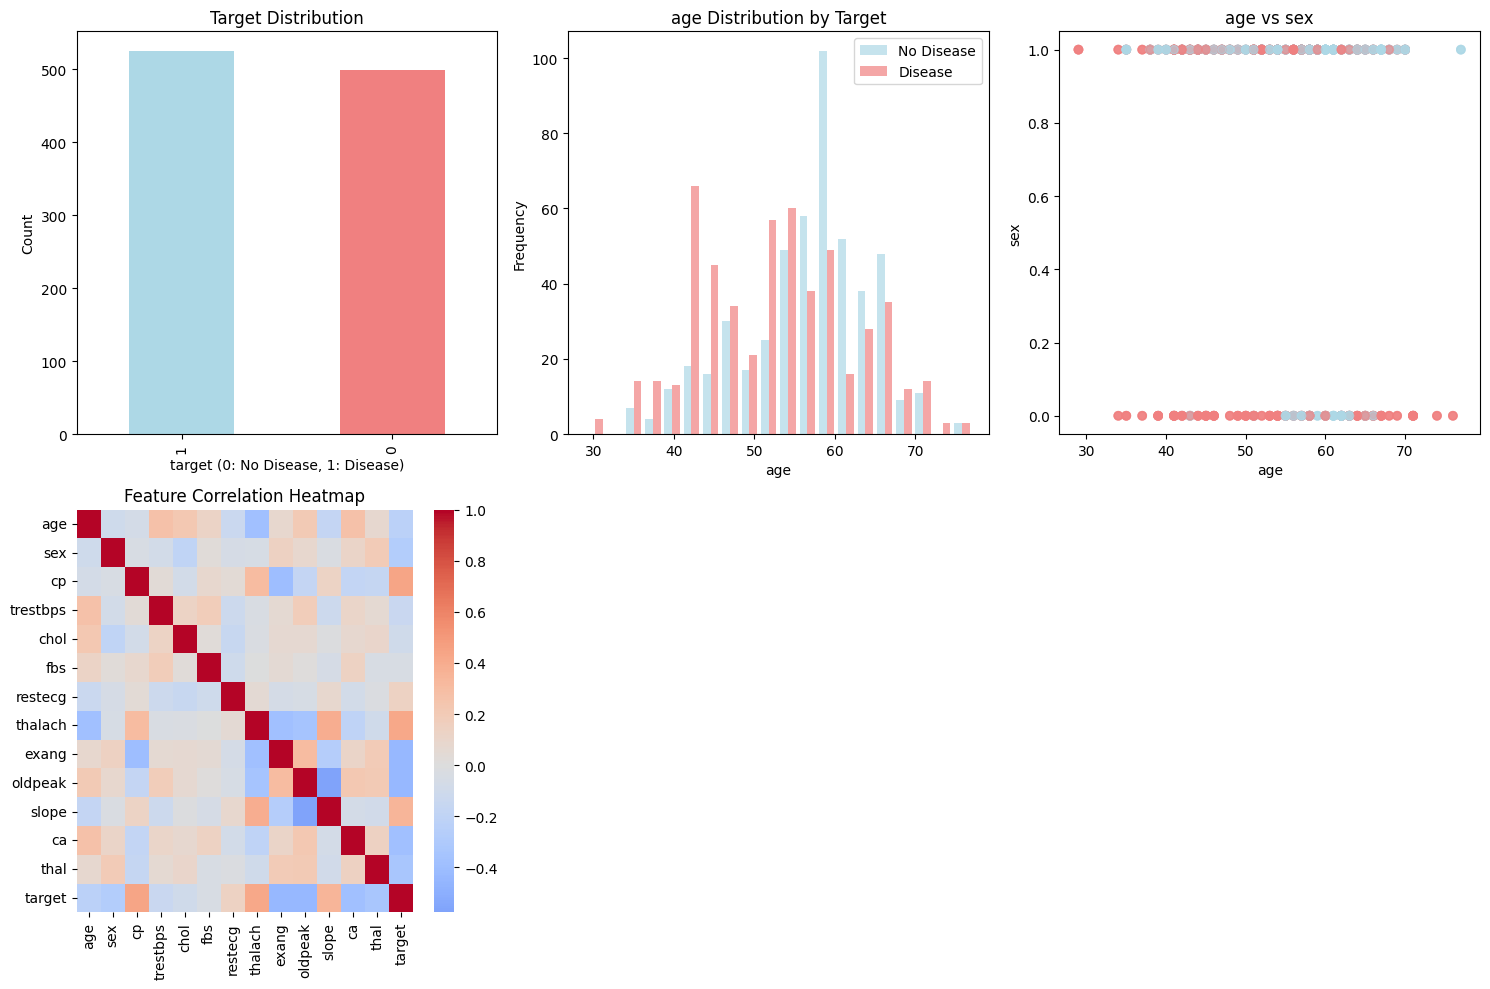


2. DATA PREPROCESSING
Training set size: 820
Test set size: 205
Training target distribution: {1: 421, 0: 399}

3. DECISION TREE CLASSIFIER
Basic Decision Tree Results:
Training Accuracy: 1.0000
Test Accuracy: 0.9854

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



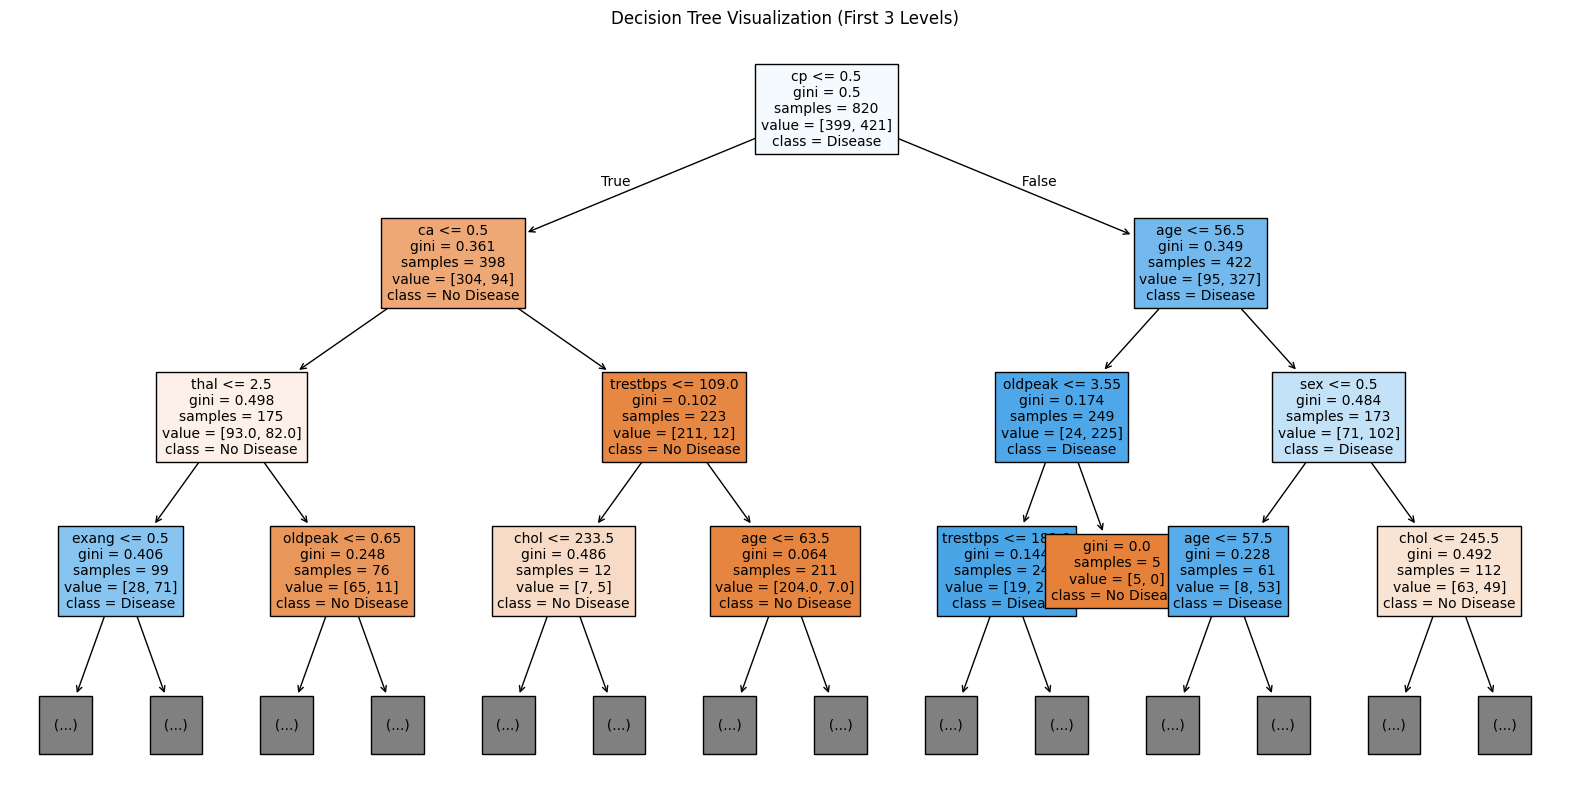


Decision Tree Rules (First 20 lines):
|--- cp <= 0.50
|   |--- ca <= 0.50
|   |   |--- thal <= 2.50
|   |   |   |--- exang <= 0.50
|   |   |   |   |--- thalach <= 96.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- thalach >  96.50
|   |   |   |   |   |--- chol <= 316.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- chol >  316.50
|   |   |   |   |   |   |--- slope <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- slope >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- exang >  0.50
|   |   |   |   |--- restecg <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- restecg >  0.50
|   |   |   |   |   |--- slope <= 1.50
|   |   |   |   |   |   |--- trestbps <= 115.00

4. ANALYZING OVERFITTING AND CONTROLLING TREE DEPTH
Optimal max_depth: 9
Best test accuracy: 0.9854

Optimized Decision Tree Results:
Training Accuracy: 0.9537
Test Accuracy: 0.9171


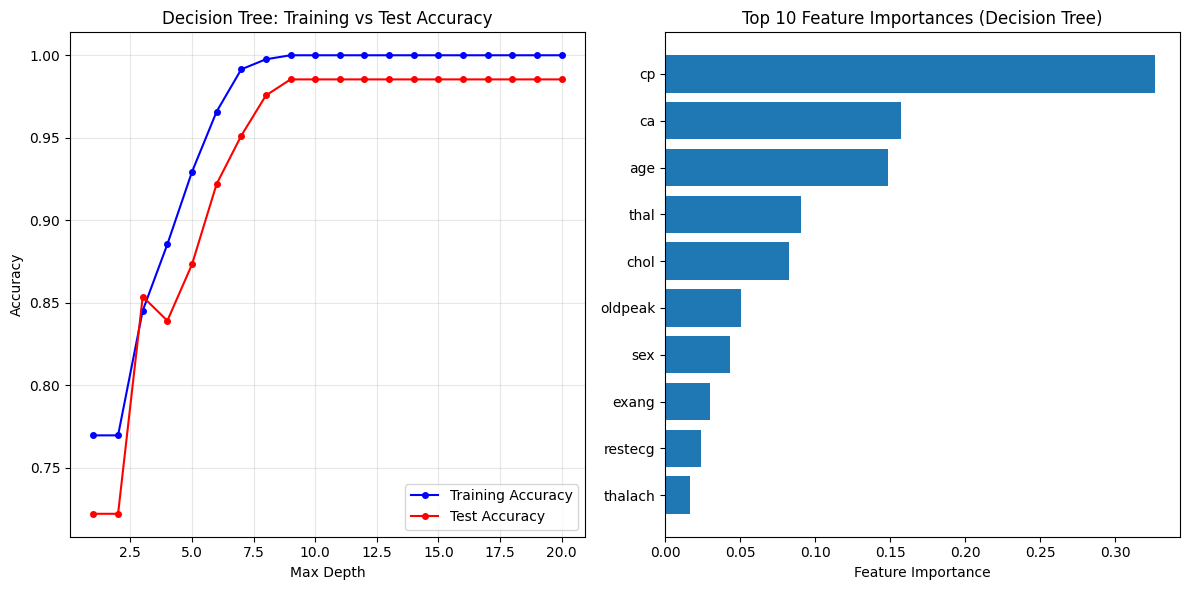


Top 10 Most Important Features (Decision Tree):
    feature  importance
2        cp    0.326948
11       ca    0.157281
0       age    0.148687
12     thal    0.090572
4      chol    0.082458
9   oldpeak    0.050460
1       sex    0.043125
8     exang    0.029958
6   restecg    0.023991
7   thalach    0.016593

5. RANDOM FOREST CLASSIFIER
Random Forest performance with different n_estimators:
n_estimators=10: Test Accuracy = 1.0000
n_estimators=50: Test Accuracy = 1.0000
n_estimators=100: Test Accuracy = 1.0000
n_estimators=200: Test Accuracy = 1.0000
n_estimators=500: Test Accuracy = 1.0000

Best Random Forest Results:
Training Accuracy: 0.9976
Test Accuracy: 0.9902

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.98      1.00      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99    

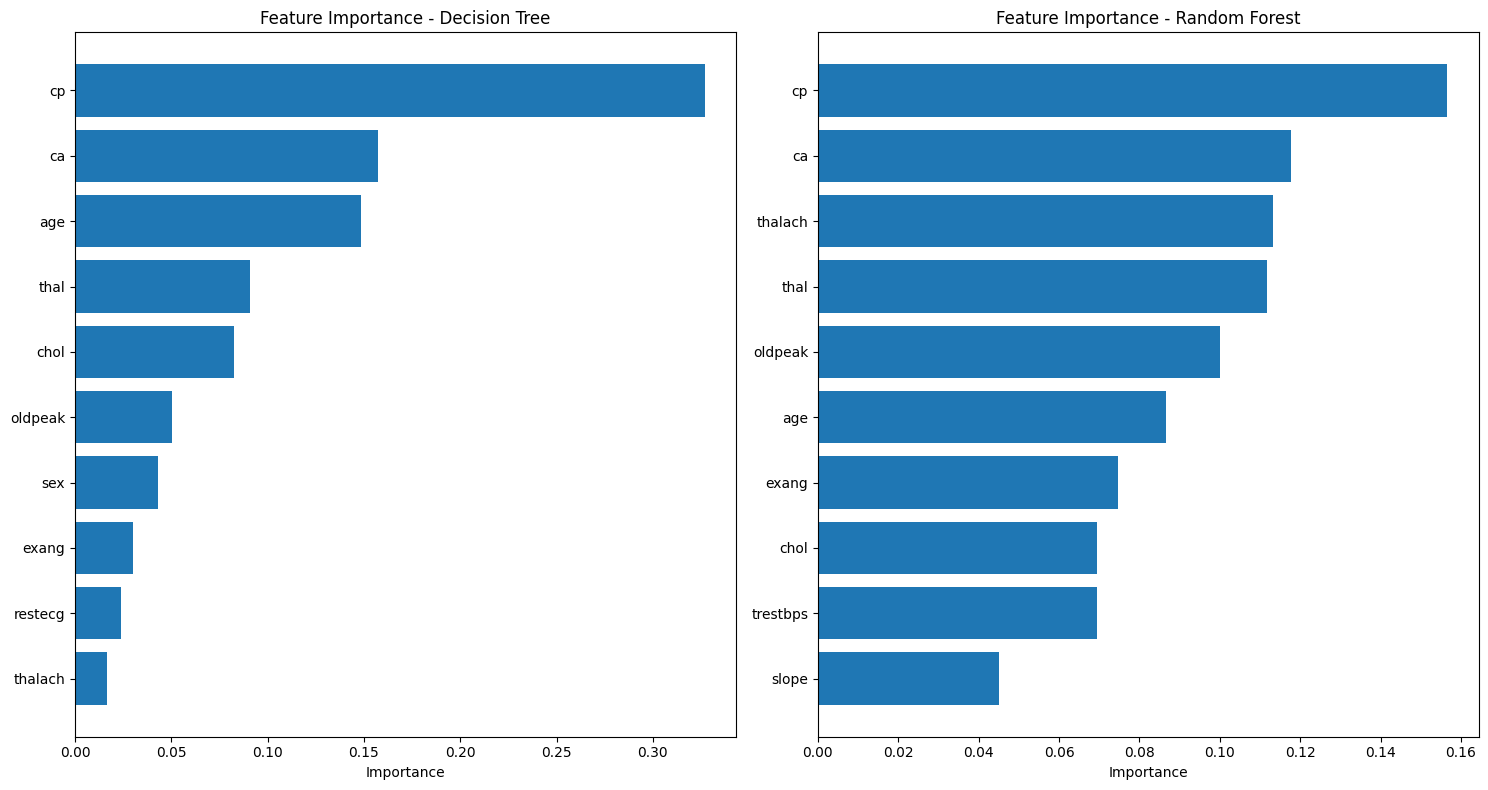

Top 10 Most Important Features (Random Forest):
     feature  importance
2         cp    0.156655
11        ca    0.117627
7    thalach    0.113158
12      thal    0.111650
9    oldpeak    0.100081
0        age    0.086653
8      exang    0.074665
4       chol    0.069562
3   trestbps    0.069339
10     slope    0.045131

Features with Biggest Importance Differences:
     feature  dt_importance  rf_importance  difference
0         cp       0.326948       0.156655    0.170293
9    thalach       0.016593       0.113158    0.096565
2        age       0.148687       0.086653    0.062034
10  trestbps       0.010758       0.069339    0.058580
5    oldpeak       0.050460       0.100081    0.049622
7      exang       0.029958       0.074665    0.044707
1         ca       0.157281       0.117627    0.039654
12     slope       0.008801       0.045131    0.036331
3       thal       0.090572       0.111650    0.021078
6        sex       0.043125       0.027650    0.015475

7. CROSS-VALIDATION EVAL

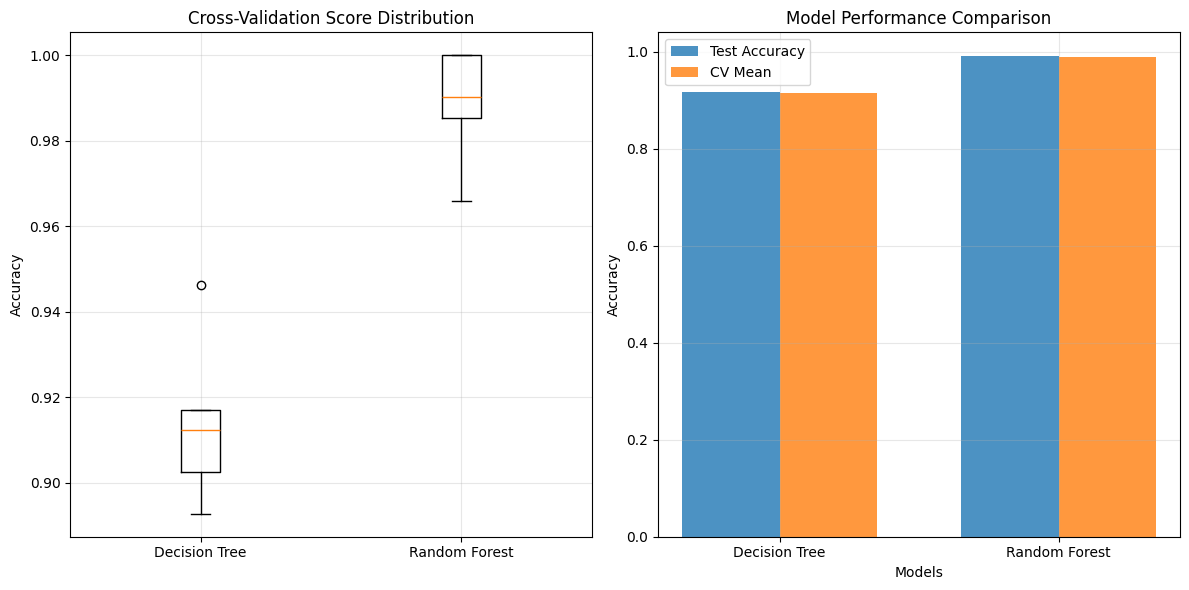


8. CONFUSION MATRICES


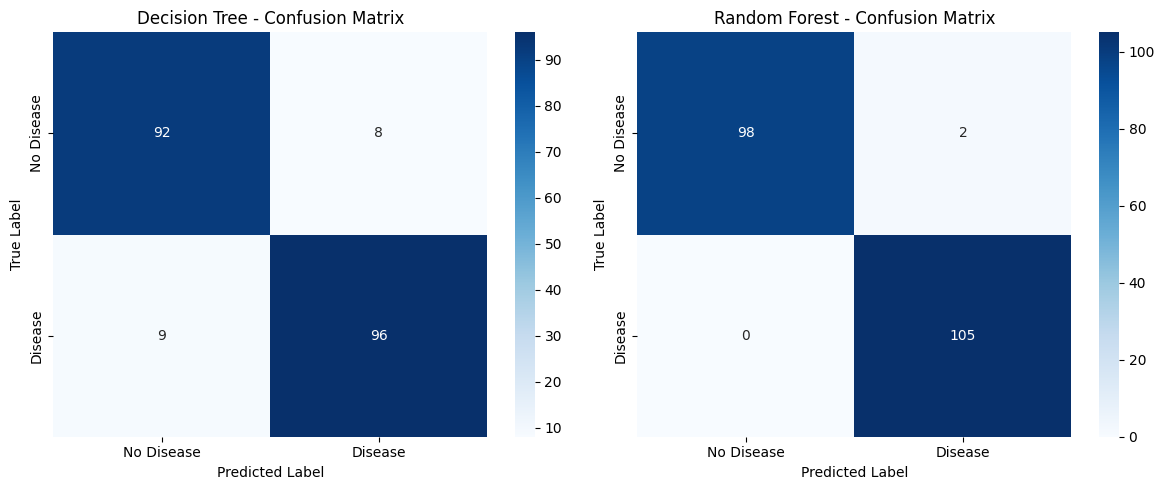


9. HYPERPARAMETER TUNING (GRID SEARCH)
Performing Grid Search for Random Forest...
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9707
Best Random Forest Test Accuracy: 1.0000

10. FINAL SUMMARY
Model Performance Summary:
                  Model  Test Accuracy  CV Mean
    Basic Decision Tree       0.985366 1.000000
Optimized Decision Tree       0.917073 0.914146
          Random Forest       0.990244 0.988293
     Best Random Forest       1.000000 0.997073

Key Insights:
1. Overfitting: Basic decision tree shows signs of overfitting
2. Optimal depth: 9 levels provide best balance
3. Random Forest: Generally more stable and better performance
4. Top 3 most important features: cp, ca, thalach
5. Cross-validation: Random Forest shows more consistent performance

ANALYSIS COMPLETE!


In [1]:
# Tree-Based Models for Heart Disease Classification
# Objective: Learn tree-based models for classification & regression
# Tools: Scikit-learn, Graphviz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random state for reproducibility
RANDOM_STATE = 42

print("="*60)
print("TREE-BASED MODELS FOR HEART DISEASE CLASSIFICATION")
print("="*60)
CSV_FILE_PATH = "heart.csv"

# Load the dataset
try:
    df = pd.read_csv(CSV_FILE_PATH)
    print(f"Successfully loaded dataset from: {CSV_FILE_PATH}")
except FileNotFoundError:
    print(f"Error: File not found at {CSV_FILE_PATH}")
    print("Please update the CSV_FILE_PATH variable with the correct path to your dataset.")
    exit()
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Display column names to verify the structure
print(f"Column names in dataset: {list(df.columns)}")

# Check if target column exists (common names: 'target', 'heart_disease', 'output', 'class')
target_column = None
possible_target_names = ['target', 'heart_disease', 'output', 'class', 'diagnosis', 'label']

for col in possible_target_names:
    if col in df.columns:
        target_column = col
        break

if target_column is None:
    print("Available columns:", df.columns.tolist())
    print("Please specify which column is the target variable.")
    # You can manually set it here if needed
    # target_column = 'your_target_column_name'
else:
    print(f"Target column identified: '{target_column}'")

print(f"Dataset shape: {df.shape}")

# Handle missing values if any
if df.isnull().sum().sum() > 0:
    print("\nMissing values found:")
    print(df.isnull().sum())
    # Simple imputation - you might want to handle this differently
    df = df.fillna(df.mean())
    print("Missing values filled with mean values.")

print(f"Target distribution: {df[target_column].value_counts().to_dict()}")
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset columns:")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")

print("\n" + "="*60)
print("1. EXPLORATORY DATA ANALYSIS")
print("="*60)

# Basic statistics
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

# Visualize target distribution
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df[target_column].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Target Distribution')
plt.xlabel(f'{target_column} (0: No Disease, 1: Disease)')
plt.ylabel('Count')

# Get numerical columns for visualization (excluding target)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_column in numerical_cols:
    numerical_cols.remove(target_column)

# Age distribution by target (if age column exists)
age_col = None
for col in ['age', 'Age', 'AGE']:
    if col in df.columns:
        age_col = col
        break

if age_col:
    plt.subplot(2, 3, 2)
    plt.hist([df[df[target_column]==0][age_col], df[df[target_column]==1][age_col]], 
             bins=20, alpha=0.7, label=['No Disease', 'Disease'], color=['lightblue', 'lightcoral'])
    plt.title(f'{age_col} Distribution by Target')
    plt.xlabel(age_col)
    plt.ylabel('Frequency')
    plt.legend()

# Scatter plot of two numerical features if available
if len(numerical_cols) >= 2:
    plt.subplot(2, 3, 3)
    colors = ['lightblue' if x == 0 else 'lightcoral' for x in df[target_column]]
    plt.scatter(df[numerical_cols[0]], df[numerical_cols[1]], c=colors, alpha=0.6)
    plt.title(f'{numerical_cols[0]} vs {numerical_cols[1]}')
    plt.xlabel(numerical_cols[0])
    plt.ylabel(numerical_cols[1])

# Correlation heatmap
plt.subplot(2, 3, 4)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("2. DATA PREPROCESSING")
print("="*60)

# Prepare features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training target distribution: {pd.Series(y_train).value_counts().to_dict()}")

print("\n" + "="*60)
print("3. DECISION TREE CLASSIFIER")
print("="*60)

# Train a basic Decision Tree
dt_basic = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt_basic.fit(X_train, y_train)

# Predictions
y_pred_dt_basic = dt_basic.predict(X_test)

print("Basic Decision Tree Results:")
print(f"Training Accuracy: {dt_basic.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_dt_basic):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_basic))

# Visualize the decision tree (first few levels only)
plt.figure(figsize=(20, 10))
plot_tree(dt_basic, 
          feature_names=X.columns, 
          class_names=['No Disease', 'Disease'],
          filled=True, 
          max_depth=3,  # Limit depth for readability
          fontsize=10)
plt.title('Decision Tree Visualization (First 3 Levels)')
plt.show()

# Print text representation of the tree (first few rules)
tree_rules = export_text(dt_basic, feature_names=list(X.columns))
print("\nDecision Tree Rules (First 20 lines):")
print('\n'.join(tree_rules.split('\n')[:20]))

print("\n" + "="*60)
print("4. ANALYZING OVERFITTING AND CONTROLLING TREE DEPTH")
print("="*60)

# Train trees with different max_depth values
depths = range(1, 21)
train_scores = []
test_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=RANDOM_STATE)
    dt.fit(X_train, y_train)
    
    train_score = dt.score(X_train, y_train)
    test_score = dt.score(X_test, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot overfitting analysis
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(depths, train_scores, 'b-o', label='Training Accuracy', markersize=4)
plt.plot(depths, test_scores, 'r-o', label='Test Accuracy', markersize=4)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Training vs Test Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Find optimal depth
optimal_depth = depths[np.argmax(test_scores)]
print(f"Optimal max_depth: {optimal_depth}")
print(f"Best test accuracy: {max(test_scores):.4f}")

# Train optimized decision tree
dt_optimized = DecisionTreeClassifier(
    max_depth=optimal_depth,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=RANDOM_STATE
)
dt_optimized.fit(X_train, y_train)

y_pred_dt_opt = dt_optimized.predict(X_test)

print(f"\nOptimized Decision Tree Results:")
print(f"Training Accuracy: {dt_optimized.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_dt_opt):.4f}")

# Feature importance for optimized tree
feature_importance_dt = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_optimized.feature_importances_
}).sort_values('importance', ascending=False)

plt.subplot(1, 2, 2)
plt.barh(feature_importance_dt['feature'][:10], feature_importance_dt['importance'][:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features (Decision Tree):")
print(feature_importance_dt.head(10))

print("\n" + "="*60)
print("5. RANDOM FOREST CLASSIFIER")
print("="*60)

# Train Random Forest with different n_estimators
estimators = [10, 50, 100, 200, 500]
rf_scores = []

print("Random Forest performance with different n_estimators:")
for n_est in estimators:
    rf = RandomForestClassifier(n_estimators=n_est, random_state=RANDOM_STATE, n_jobs=-1)
    rf.fit(X_train, y_train)
    test_score = rf.score(X_test, y_test)
    rf_scores.append(test_score)
    print(f"n_estimators={n_est}: Test Accuracy = {test_score:.4f}")

# Train optimized Random Forest
rf_best = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
rf_best.fit(X_train, y_train)

y_pred_rf = rf_best.predict(X_test)

print(f"\nBest Random Forest Results:")
print(f"Training Accuracy: {rf_best.score(X_train, y_train):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\n" + "="*60)
print("6. FEATURE IMPORTANCE COMPARISON")
print("="*60)

# Compare feature importances
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_best.feature_importances_
}).sort_values('importance', ascending=False)

# Plot comparison
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
top_features_dt = feature_importance_dt.head(10)
plt.barh(range(len(top_features_dt)), top_features_dt['importance'])
plt.yticks(range(len(top_features_dt)), top_features_dt['feature'])
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
top_features_rf = feature_importance_rf.head(10)
plt.barh(range(len(top_features_rf)), top_features_rf['importance'])
plt.yticks(range(len(top_features_rf)), top_features_rf['feature'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

print("Top 10 Most Important Features (Random Forest):")
print(feature_importance_rf.head(10))

# Compare models side by side
comparison_df = pd.merge(
    feature_importance_dt[['feature', 'importance']].rename(columns={'importance': 'dt_importance'}),
    feature_importance_rf[['feature', 'importance']].rename(columns={'importance': 'rf_importance'}),
    on='feature'
)
comparison_df['difference'] = abs(comparison_df['dt_importance'] - comparison_df['rf_importance'])
comparison_df = comparison_df.sort_values('difference', ascending=False)

print("\nFeatures with Biggest Importance Differences:")
print(comparison_df.head(10))

print("\n" + "="*60)
print("7. CROSS-VALIDATION EVALUATION")
print("="*60)

# Perform cross-validation for both models
cv_scores_dt = cross_val_score(dt_optimized, X, y, cv=5, scoring='accuracy')
cv_scores_rf = cross_val_score(rf_best, X, y, cv=5, scoring='accuracy')

print("5-Fold Cross-Validation Results:")
print(f"Decision Tree - Mean: {cv_scores_dt.mean():.4f} (+/- {cv_scores_dt.std() * 2:.4f})")
print(f"Random Forest - Mean: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std() * 2:.4f})")

# Plot cross-validation scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot([cv_scores_dt, cv_scores_rf], labels=['Decision Tree', 'Random Forest'])
plt.ylabel('Accuracy')
plt.title('Cross-Validation Score Distribution')
plt.grid(True, alpha=0.3)

# Model comparison summary
models = ['Decision Tree', 'Random Forest']
test_accuracies = [accuracy_score(y_test, y_pred_dt_opt), accuracy_score(y_test, y_pred_rf)]
cv_means = [cv_scores_dt.mean(), cv_scores_rf.mean()]

plt.subplot(1, 2, 2)
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, test_accuracies, width, label='Test Accuracy', alpha=0.8)
plt.bar(x + width/2, cv_means, width, label='CV Mean', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("8. CONFUSION MATRICES")
print("="*60)

# Plot confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm_dt = confusion_matrix(y_test, y_pred_dt_opt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Decision Tree - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.subplot(1, 2, 2)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("9. HYPERPARAMETER TUNING (GRID SEARCH)")
print("="*60)

# Grid search for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("Performing Grid Search for Random Forest...")
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=RANDOM_STATE),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Test the best model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print(f"Best Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")

print("\n" + "="*60)
print("10. FINAL SUMMARY")
print("="*60)

summary_data = {
    'Model': ['Basic Decision Tree', 'Optimized Decision Tree', 'Random Forest', 'Best Random Forest'],
    'Test Accuracy': [
        accuracy_score(y_test, y_pred_dt_basic),
        accuracy_score(y_test, y_pred_dt_opt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_best_rf)
    ],
    'CV Mean': [
        cross_val_score(dt_basic, X, y, cv=5).mean(),
        cv_scores_dt.mean(),
        cv_scores_rf.mean(),
        cross_val_score(best_rf, X, y, cv=5).mean()
    ]
}

summary_df = pd.DataFrame(summary_data)
print("Model Performance Summary:")
print(summary_df.to_string(index=False))

print(f"\nKey Insights:")
print(f"1. Overfitting: Basic decision tree shows signs of overfitting")
print(f"2. Optimal depth: {optimal_depth} levels provide best balance")
print(f"3. Random Forest: Generally more stable and better performance")
print(f"4. Top 3 most important features: {', '.join(feature_importance_rf.head(3)['feature'].tolist())}")
print(f"5. Cross-validation: Random Forest shows more consistent performance")

print("\n" + "="*60)
print("ANALYSIS COMPLETE!")
print("="*60)